in this project ,my goal is to use the CNN model to classify people

i know i am the superman

i will save peoples lives:))

# New Section

In [87]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [39]:
import zipfile

In [47]:
!wget -cq https://data.mendeley.com/datasets/rscbjbr9sj/2/files/f12eaf6d-6023-432f-acc9-80c9d7393433/ChestXRay2017.zip


In [49]:
!ls

'archive (3).zip'   ChestXRay2017.zip   sample_data


In [50]:
zip = zipfile.ZipFile("ChestXRay2017.zip","r")

In [51]:
zip.extractall()


In [52]:
zip.close()

In [57]:
!ls ./chest_xray/train/NORMAL

IM-0115-0001.jpeg		NORMAL2-IM-0482-0001.jpeg
IM-0117-0001.jpeg		NORMAL2-IM-0485-0001.jpeg
IM-0119-0001.jpeg		NORMAL2-IM-0486-0001.jpeg
IM-0122-0001.jpeg		NORMAL2-IM-0487-0001.jpeg
IM-0125-0001.jpeg		NORMAL2-IM-0488-0001.jpeg
IM-0127-0001.jpeg		NORMAL2-IM-0489-0001.jpeg
IM-0128-0001.jpeg		NORMAL2-IM-0490-0001.jpeg
IM-0129-0001.jpeg		NORMAL2-IM-0491-0001.jpeg
IM-0131-0001.jpeg		NORMAL2-IM-0493-0001.jpeg
IM-0133-0001.jpeg		NORMAL2-IM-0496-0001.jpeg
IM-0135-0001.jpeg		NORMAL2-IM-0497-0001.jpeg
IM-0137-0001.jpeg		NORMAL2-IM-0499-0001.jpeg
IM-0140-0001.jpeg		NORMAL2-IM-0500-0001.jpeg
IM-0141-0001.jpeg		NORMAL2-IM-0501-0001.jpeg
IM-0143-0001.jpeg		NORMAL2-IM-0502-0001.jpeg
IM-0145-0001.jpeg		NORMAL2-IM-0503-0001.jpeg
IM-0147-0001.jpeg		NORMAL2-IM-0506-0001.jpeg
IM-0149-0001.jpeg		NORMAL2-IM-0507-0001.jpeg
IM-0151-0001.jpeg		NORMAL2-IM-0508-0001.jpeg
IM-0152-0001.jpeg		NORMAL2-IM-0509-0001.jpeg
IM-0154-0001.jpeg		NORMAL2-IM-0511-0001.jpeg
IM-0156-0001.jpeg		NORMAL2-IM-0512-0001.jpeg
IM-0158-00

In [58]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


let's define our dataset's path

In [59]:
train_data_normal_path = "./chest_xray/train/NORMAL/"
train_data_pneumonia_path = "./chest_xray/train/PNEUMONIA/"

test_data_normal_path = "./chest_xray/test/NORMAL/"
test_data_pneumonia_path = "./chest_ray/test/PNEUMONIA/"

now,lets create a function to plot a random image from a desired directory

In [65]:
import random
import matplotlib.image as mpimg
import os

def show_random(target_folder):

    folder = target_folder

    random_image = random.sample(os.listdir(folder),1)

    zaza = mpimg.imread(folder+"/"+random_image[0])

    #zaza = np.expand_dims(zaza,axis=-1)
    plt.imshow(zaza,cmap="gray")
    print(zaza.shape)
    #plt.figure(figsize=(10,10))
    #plt.imshow(random_image)
    plt.axis(False)



(1577, 2014)


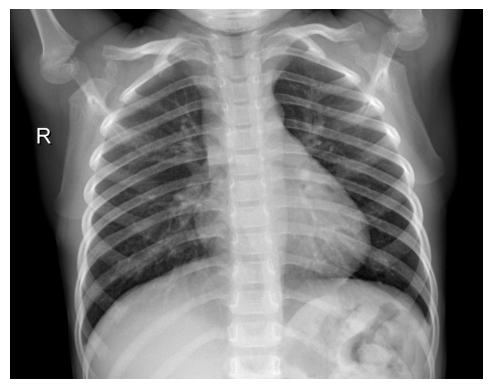

In [67]:
show_random(train_data_normal_path)

In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(85)

In [69]:
train_data_path = "./chest_xray/train/"
test_data_path = "./chest_xray/test/"

In [71]:
train_data_gen = ImageDataGenerator(rescale=1./255,featurewise_center=True)
test_data_gen = ImageDataGenerator(rescale=1./255.,featurewise_center=True)


In [72]:
train_data = train_data_gen.flow_from_directory(train_data_path,
                                                batch_size=32,
                                                target_size = (720,720),
                                                class_mode="binary",
                                                seed = 85)

test_data = test_data_gen.flow_from_directory(test_data_path,
                                              batch_size=32,
                                              target_size=(720,720),
                                              class_mode="binary",
                                              seed=85)


Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [73]:
type(train_data)

keras.src.preprocessing.image.DirectoryIterator

In [74]:
type(train_data)

keras.src.preprocessing.image.DirectoryIterator

we have created dataset fpor training our model

now lets create our CNN model

In [78]:
model1 = tf.keras.Sequential()

model1.add(tf.keras.layers.Conv2D(filters=20,kernel_size=2
                                  ,activation=tf.keras.activations.relu))

model1.add(tf.keras.layers.Conv2D(filters=10,kernel_size=2,
                                  activation=tf.keras.activations.relu))

model1.add(tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"))

model1.add(tf.keras.layers.Conv2D(filters=20,
                                  kernel_size=2,
                                  activation=tf.keras.activations.relu))

model1.add(tf.keras.layers.Conv2D(filters=15,kernel_size=2,
                                  activation=tf.keras.activations.relu))

model1.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                     padding="valid"))

model1.add(tf.keras.layers.Flatten())

model1.add(tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid))


In [79]:
model1.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=[tf.keras.metrics.BinaryAccuracy()])


In [81]:
history= model1.fit(train_data,
           validation_data=test_data,
           epochs=8,
           verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/8
164/164 - 132s - loss: 0.0122 - binary_accuracy: 0.9960 - val_loss: 3.1162 - val_binary_accuracy: 0.7212 - 132s/epoch - 806ms/step
Epoch 2/8
164/164 - 130s - loss: 0.0041 - binary_accuracy: 0.9989 - val_loss: 2.2456 - val_binary_accuracy: 0.7917 - 130s/epoch - 794ms/step
Epoch 3/8
164/164 - 133s - loss: 0.0011 - binary_accuracy: 1.0000 - val_loss: 2.8563 - val_binary_accuracy: 0.7740 - 133s/epoch - 812ms/step
Epoch 4/8
164/164 - 134s - loss: 4.0441e-04 - binary_accuracy: 1.0000 - val_loss: 3.5220 - val_binary_accuracy: 0.7484 - 134s/epoch - 816ms/step
Epoch 5/8
164/164 - 133s - loss: 1.5570e-04 - binary_accuracy: 1.0000 - val_loss: 3.5707 - val_binary_accuracy: 0.7548 - 133s/epoch - 809ms/step
Epoch 6/8
164/164 - 132s - loss: 9.3554e-05 - binary_accuracy: 1.0000 - val_loss: 3.7266 - val_binary_accuracy: 0.7516 - 132s/epoch - 803ms/step
Epoch 7/8
164/164 - 131s - loss: 6.2496e-05 - binary_accuracy: 1.0000 - val_loss: 3.7644 - val_binary_accuracy: 0.7564 - 131s/epoch - 800ms/st

In [82]:
model1.evaluate(test_data)

20/20 [==============================] - 13s 637ms/step - loss: 3.9941 - binary_accuracy: 0.7500


[3.9941065311431885, 0.75]

as we can see,we have a giant overfit

we can do some operations to improve our performance on the test data

<Axes: >

<Figure size 1000x1000 with 0 Axes>

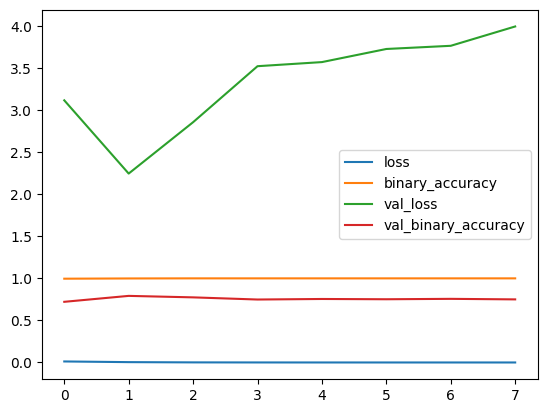

In [86]:
plt.figure(figsize=(10,10))
pd.DataFrame(history.history).plot()